# Fie Upon Thee, Autocorrect!

<img src="img/shakespeare.jpg" width="200">

<br><br><br>

## Recap of yesterday

I'll just leave this here so we can refer back to it.

* Quantitative data analysts distinguish between **measurements**, which are direct observations or outcomes of experiments, and **models**, which are mathematical machines that describe, predict, or explain the measurements in a quantitative way.
* Measurements can be expressed as points in an **N-dimensional space**. Since the number of measurements is finite, they can't completely fill the space.
  * Measurements can be represented in a 2-D data frame or 2-D array, in which the rows are repeated observations or experiments and the columns are observed attributes, one column/dimension per attribute.
  * Measurements can be visualized as a `scatter` plot.
  * Measurements say what _is_ true.
* Models, when questioned, provide a response for any point in the **N-dimensional space**, so a model completely fills the space.
  * Models can be represented in an N-dimensional array, as a value for each point in space, or as a function that returns a response for N arguments.
  * Models can be visualized by coloring a space with `imshow` or `contourf`, or with contour lines (like mountains on an elevation map).
  * The model-function's response may be
    * the probability that that combination of attributes exists, or
    * a prediction of some other attribute (or its probability), or
    * a category that we use to organize the data but isn't directly measurable, such as species (or its probability).
  * Models say what _would be_ true, under the given conditions, assuming that the model is accurate, etc.
* Models are algorithms involving numerical and categorical values: changing these values changes the model.
  * **Parameters** are values that we tune in an automated **fitting** procedure to find the best model for some measurements.
  * **Hyperparameters** are not part of the fitting procedure, but also impact the quality of the fitted model.
  * Models that don't accurately resemble their training data are **underfitted**.
  * Models that are too similar to their training data (take the individual points too literally—don't generalize well) are **overfitted**.
  * Both underfitting and overfitting are problematic.
* **Machine learning** is a fitting procedure, usually with very large datasets and very large numbers of parameters.
* A **neural network** is currently the most successful kind of machine learning model.
  * A neural network consists of layers of linear functions with many parameters sandwiched between non-linear functions.
  * Optimizing a neural network involves tuning the parameters of the linear functions so that the whole model fits the training data.
  * **Deep learning** is a neural network with many layers (which became feasible about 10 years ago).

<br><br><br>

## What we'll do today

Short discussion of categorical variables with the penguins.

A more detailed look at text-based data using the complete works of Shakespeare.

Build an autocomplete engine, learning a little about SQL and databases along the way.

Talk about the similarities and differences between our autocomplete engine and large language models like ChatGPT.

<br><br><br>

## Categorical variables among the penguins

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
penguins = pd.read_csv("data/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


<br><br><br>

In [3]:
penguins[["species", "island", "sex"]]

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,female
...,...,...,...
339,Chinstrap,Dream,male
340,Chinstrap,Dream,female
341,Chinstrap,Dream,male
342,Chinstrap,Dream,male


In [4]:
penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [5]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
penguins["sex"].unique()

array(['male', 'female', nan], dtype=object)

<br><br><br>

Many (not all!) machine learning models require inputs and outputs to be numerical. How can we do that?

<br><br><br>

### Method 1

Associate a number to each category. We've already done this.

In [8]:
pd.Categorical(penguins["species"]).codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
pd.Categorical(penguins["island"]).codes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
pd.Categorical(penguins["sex"]).codes

array([ 1,  0,  0, -1,  0,  1,  0,  1, -1, -1, -1, -1,  0,  1,  1,  0,  0,
        1,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  0,  0,  1,  0,  1, -1,  1,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,
        1,  0,  1,  1,  0

<br><br><br>

Notice that this plot is using a numerical relationship among Adelie, Gentoo, and Chinstrap to give the horizontal axis an order (Adelie first, then Gentoo, then Chinstrap).

<Axes: xlabel='species'>

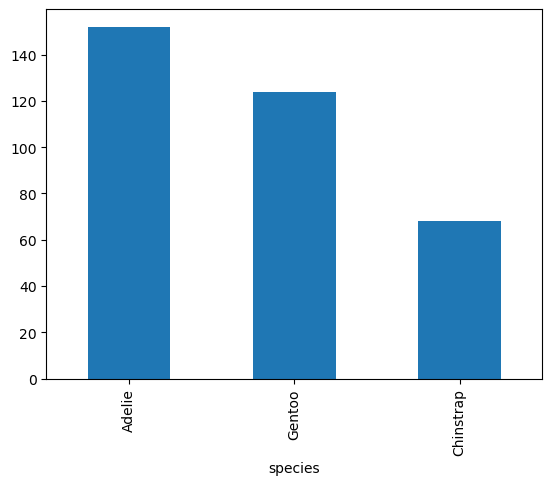

In [11]:
penguins["species"].value_counts().plot(kind="bar")

In [13]:
pd.crosstab(penguins["species"], penguins["island"])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


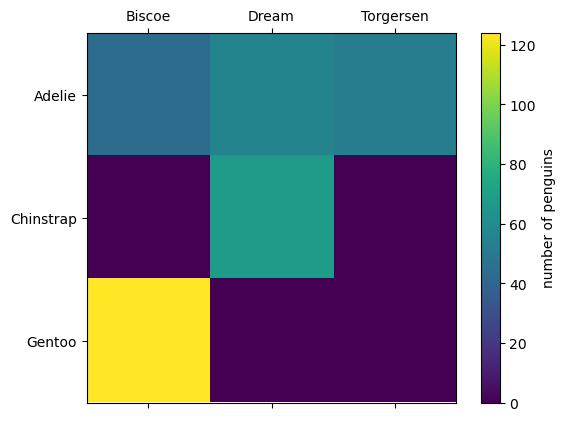

In [22]:
fig, ax = plt.subplots()

matrix = ax.matshow(pd.crosstab(penguins["species"], penguins["island"]).values)
fig.colorbar(matrix, label="number of penguins")

ax.set_xticks([0, 1, 2], ["Biscoe", "Dream", "Torgersen"])
ax.set_yticks([0, 1, 2], ["Adelie", "Chinstrap", "Gentoo"])

None

<br><br><br>

The disadvantage of this method is that the order is not meaningful—it's something we made up—and a machine learning model might optimize for it.

It's an invitation to overfitting (which can be controlled, but still).

<br><br><br>

### Method 2

Create a dimension for each value of a categorical variable:

In [26]:
expanded_penguins = pd.get_dummies(penguins.dropna(), columns=["species", "island", "sex"])
expanded_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


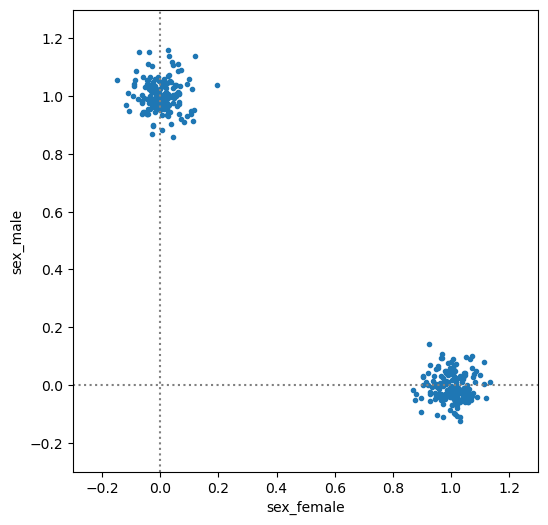

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))

sex2D = expanded_penguins[["sex_female", "sex_male"]].values

# scatter a little, so we can see overlapping points
sex2D = sex2D.astype(np.float64) + np.random.normal(0, 0.05, (len(expanded_penguins), 2))

ax.scatter(sex2D[:, 0], sex2D[:, 1], marker=".")

ax.set_xlim(-0.3, 1.3)
ax.set_ylim(-0.3, 1.3)
ax.set_xlabel("sex_female")
ax.set_ylabel("sex_male")
ax.axhline(0, color="gray", ls=":")
ax.axvline(0, color="gray", ls=":")

None

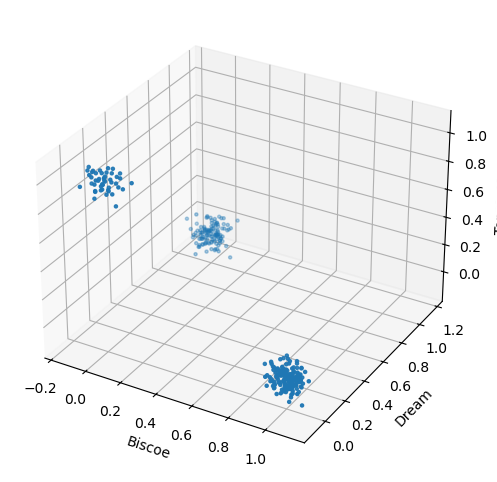

In [51]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

island3D = expanded_penguins[["island_Biscoe", "island_Dream", "island_Torgersen"]].values

# scatter a little, so we can see overlapping points
island3D = island3D.astype(np.float64) + np.random.normal(0, 0.05, (len(expanded_penguins), 3))

ax.scatter(island3D[:, 0], island3D[:, 1], island3D[:, 2], marker=".")

ax.set_xlabel("Biscoe")
ax.set_ylabel("Dream")
ax.set_zlabel("Torgersen")

None

<br><br><br>

The disadvantages of this method are that

* we quickly end up with a lot of dimensions, which uses more memory and computation time, and
* all the values between and beyond 0 and 1 are meaningless.

But if you can afford it, it's a robust way to make models!

<br><br><br>

## Dataset: the complete works of Shakespeare

This used to be a big dataset, used to illustrate large storage devices, like in [this definition of CD-ROM](https://vintageapple.org/apple_ii/pdf/Apple_IIGS__Ownwers_Guide_1986.pdf) from 1986:

<img src="img/shakespeare-a-big-dataset.png" width="600">

Now it's small enough to easily load in JupyterLite but is still big enough to be interesting.

<br><br><br>

This file comes from Project Gutenberg, [ebook #100](https://www.gutenberg.org/ebooks/100):

In [52]:
with open("data/shakespeare.txt") as file:
    corpus = file.read()

In [53]:
len(corpus)

5367504

In [55]:
len(corpus) / 1e6

5.367504

5.36 MB (a whole laser disk, apparently).

<br><br><br>

In [54]:
print(corpus[100000:101000])

ook up that fire,
Which many legions of true hearts had warmed,
And so the general of hot desire,
Was sleeping by a virgin hand disarmed.
This brand she quenched in a cool well by,
Which from Love’s fire took heat perpetual,
Growing a bath and healthful remedy,
For men diseased; but I, my mistress’ thrall,
  Came there for cure and this by that I prove,
  Love’s fire heats water, water cools not love.

THE END

ALL’S WELL THAT ENDS WELL

Contents

ACT I
Scene I. Rossillon. A room in the Countess’s palace.
Scene II. Paris. A room in the King’s palace.
Scene III. Rossillon. A Room in the Palace.

ACT II
Scene I. Paris. A room in the King’s palace.
Scene II. Rossillon. A room in the Countess’s palace.
Scene III. Paris. The King’s palace.
Scene IV. Paris. The King’s palace.
Scene V. Another room in the same.

ACT III
Scene I. Florence. A room in the Duke’s palace.
Scene II. Rossillon. A room in the Countess’s palace.
Scene III. Florence. Before the Duke’s palace.
Scene IV. Rossillon. A roo

<br><br><br>

What distinct characters does it have?

In [57]:
set(corpus)

{'\n',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'À',
 'Æ',
 'Ç',
 'É',
 'à',
 'â',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'œ',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '™',
 '\ufeff'}